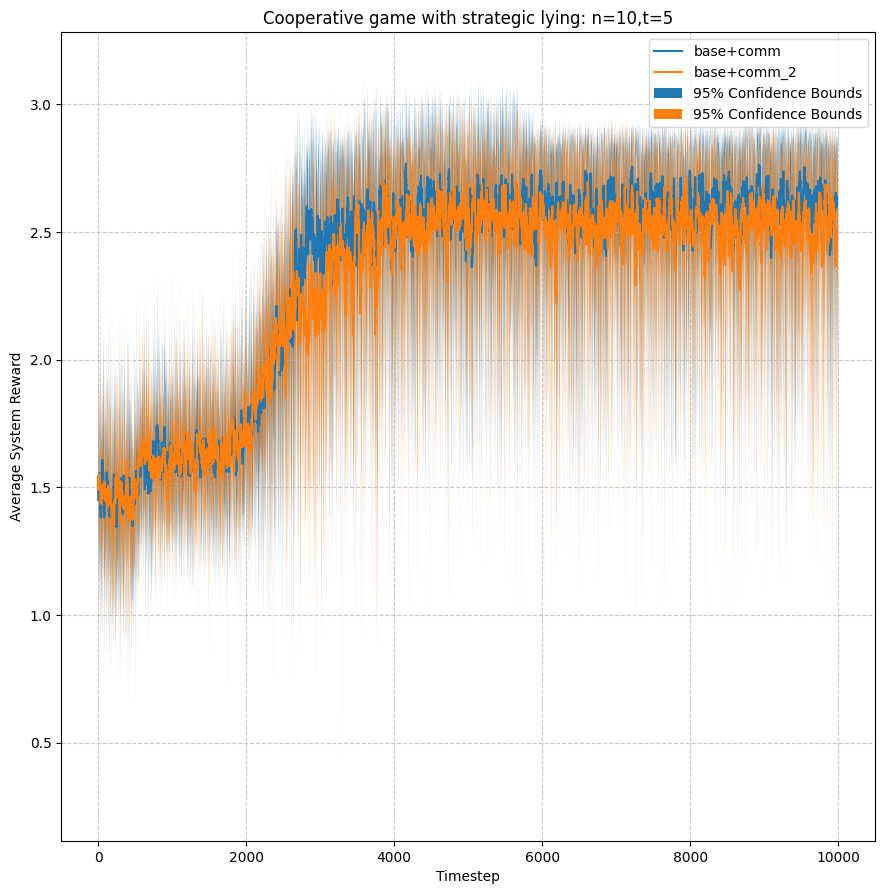

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 10
t = 5
z_level= 1

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

    s_dev = np.std(steps_to_complete, axis=0)


# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew.npy')
mean1 = np.mean(cum_rew_1, axis=0) # average over sims
s_dev1 = np.std(cum_rew_1, axis=0)
lower_bound1 = mean1 - z_level * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))
upper_bound1 = mean1 + z_level  * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))

cum_rew_2 = np.load(f'data/base_comm/n{n}t{t}_cum_rew2.npy')
mean2 = np.mean(cum_rew_2, axis=0) # average over sims
s_dev2 = np.std(cum_rew_2, axis=0)
lower_bound2 = mean2 - z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))
upper_bound2 = mean2 + z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))


# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Reward')

plt.plot(moving_average(mean1,20), label='base+comm')
plt.plot(moving_average(mean2,20), label='base+comm_2')
plt.fill_between(range(len(mean1)), lower_bound1, upper_bound1, alpha=1, label='95% Confidence Bounds')
plt.fill_between(range(len(mean2)), lower_bound2, upper_bound2, alpha=1, label='95% Confidence Bounds')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


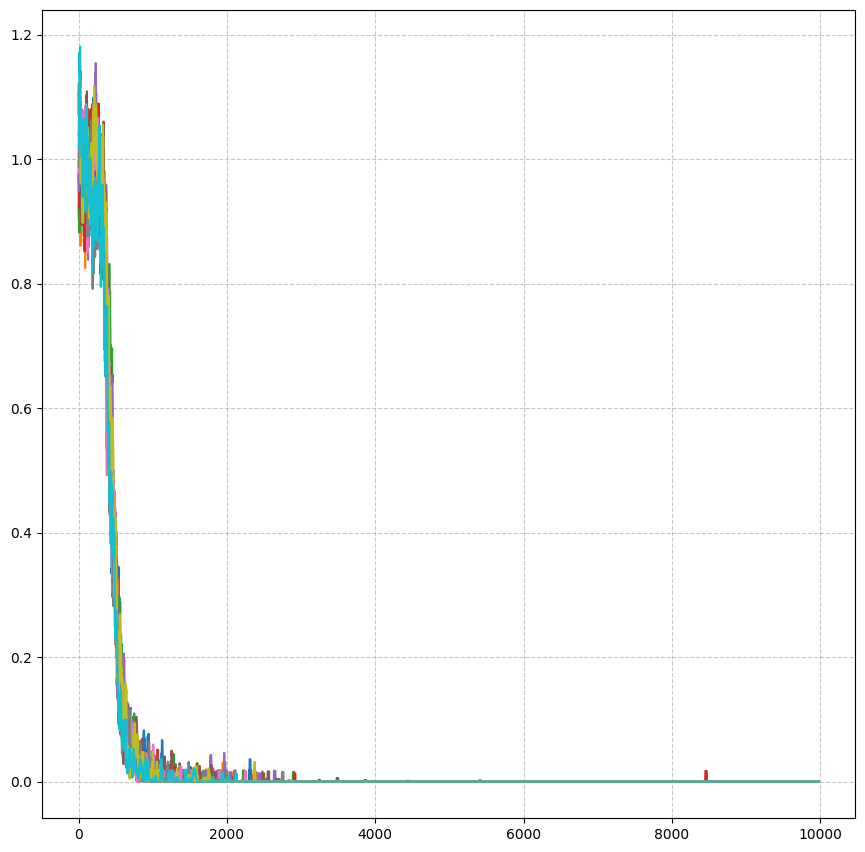

In [88]:
actions_1 = np.load(f'data/base_comm/n{n}t{t}_actions.npy')

for j in range(n):
    col  = np.mean(actions_1[:,:,j],axis=0)
    plt.plot(moving_average(col, 21))

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.grid(True, linestyle='--', alpha=0.7)

In [89]:
struct_1 = np.load(f'data/base_comm/n{n}t{t}_cstruct.npy')

sets_list = [set([f'{i+1}' for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)



[{'10', '1', '4', '8', '3', '7'}, set(), set(), set(), {'9', '5', '6', '2'}]
